# Advanced Graphic Processing

In [1]:
# 
# Based environment:
# 
from __future__ import print_function
from  matplotlib import pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import pandas as pd


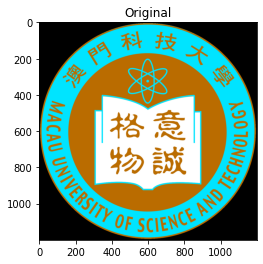

In [7]:
image = cv2.imread("../img_source/must_logo.png")
plt.imshow(image)
plt.title('Original')
plt.show()

## Smoothing and Blurring

It’s what 
happens when your camera takes a picture out of focus.
Sharper regions in the image lose their detail, normally as
a disc/circular shape.

### Average

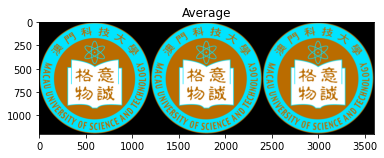

In [3]:
blurred=np.hstack([
    cv2.blur(image,(3,3)),
    cv2.blur(image,(5,5)),
    cv2.blur(image,(7,7))
])

plt.imshow(blurred)
plt.title('Average')
plt.show()

### Gaussian

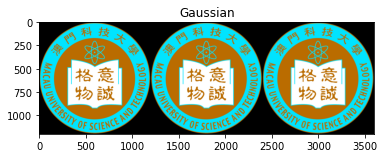

In [12]:
blurred=np.hstack([
    cv2.GaussianBlur(image,(3,3),0),
    cv2.GaussianBlur(image,(5,5),0),
    cv2.GaussianBlur(image,(7,7),0)
])

plt.imshow(blurred)
plt.title('Gaussian')
plt.show()

### median

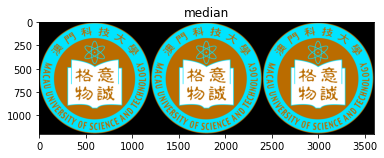

In [7]:
blurred=np.hstack([
    cv2.medianBlur(image,3),
    cv2.medianBlur(image,5),
    cv2.medianBlur(image,7)
])

plt.imshow(blurred)
plt.title('median')
plt.show()

### Bilateral

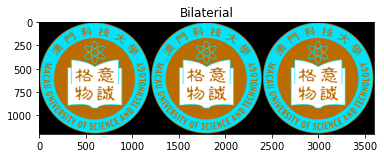

In [8]:
blurred = np.hstack((
    cv2.bilateralFilter(image, 5, 21, 21),
    cv2.bilateralFilter(image, 7, 31, 31),
    cv2.bilateralFilter(image, 9, 41, 41)
))

plt.imshow(blurred)
plt.title('Bilaterial')
plt.show()

## Thresholding
Applying simple thresholding methods requires human intervention.
We must specify a threshold value $T$. All pixel
intensities below $T$ are set to $0$. And all pixel intensities
greater than $T$ are set to $255$.

### Adaptive Thresholding

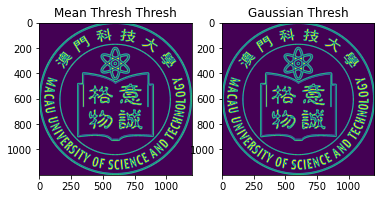

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(image, (5, 5), 0)

thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.subplot(1,2,1)
plt.imshow(thresh)
plt.title("Mean Thresh Thresh")

thresh = cv2.adaptiveThreshold(blurred, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.subplot(1,2,2)
plt.imshow(thresh)
plt.title("Gaussian Thresh")
plt.show()

### Ostu and Riddle 

In [10]:
import mahotas

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(image, (5, 5), 0)

T = mahotas.otsu(blurred)
print("Otsu’s threshold: {}".format(T))

thresh = image.copy()
thresh[thresh > T]=255
thresh[thresh<255]=0
thresh=cv2.bitwise_not(thresh)
plt.subplot(1,2,1)
plt.imshow(thresh)
plt.title("Otsu")

T=mahotas.rc(blurred)
print("Riddle-Calvard: {}".format(T))
thresh = image.copy()
thresh[thresh > T]=255
thresh[thresh<255]=0
thresh=cv2.bitwise_not(thresh)
plt.subplot(1,2,2)
plt.imshow(thresh)
plt.title("Riddle-Calvard")
plt.show()

## Gradients and Edge Dectection

### Canny

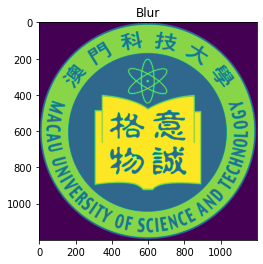

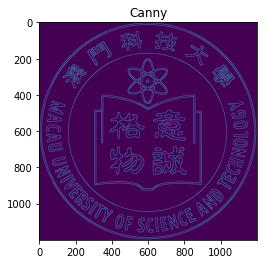

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(image)
plt.title('Blur')
plt.show()

canny = cv2.Canny(image, 100, 150)
plt.imshow(canny)
plt.title('Canny')
plt.show()

### Sobel and Laplacian

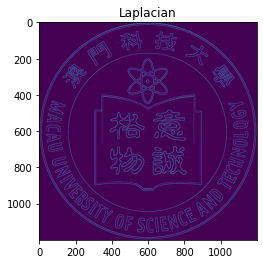

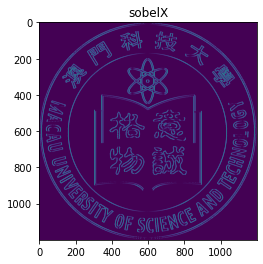

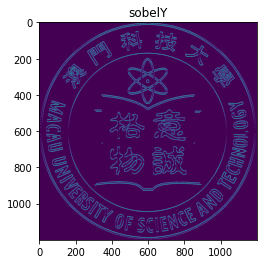

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lap=cv2.Laplacian(image,cv2.CV_64F)
lap=np.uint8(np.absolute(lap))

plt.imshow(lap)
plt.title("Laplacian")
plt.show()

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobelX)
plt.title("sobelX")
plt.show()

plt.imshow(sobelY)
plt.title("sobelY")
plt.show()

## Contours

Previously, we explored how to detect edges in an image
of circles.

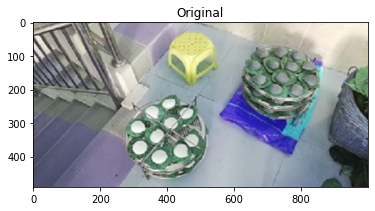

In [4]:
image = cv2.imread("../img_source/food.jpg")
plt.imshow(image)
plt.title('Original')
plt.show()

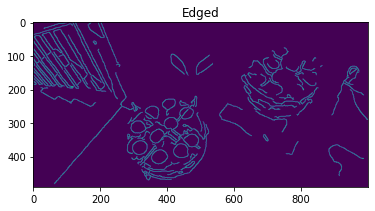

I count 152 coins in this image


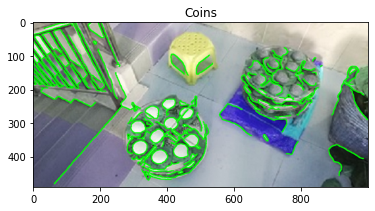

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged)
plt.title('Edged')
plt.show()

cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.imshow(coins)
plt.title('Coins')
plt.show()